# Data Mining Challenge

#### Jiyeon Song (A17151720)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import re


%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

Assignment Submission Page: https://www.kaggle.com/competitions/ucsd-dsc190-wi23-introduction-to-data-mining/

In [2]:
df = pd.read_csv("train.csv")
df

C:\Users\jyson\AppData\Local\Temp\ipykernel_12384\1862463380.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,Super convenient to almost all subway lines. A...,Your room has a very comfortable queen sized b...,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,3958032,Private Room Amazing View in EV,"Private room in cozy, sun-drenched & plant fil...",NaN,"Private room in cozy, sun-drenched & plant fil...",none,NaN,NaN,NaN,NaN,...,9.0,9.0,8.0,f,f,strict_14_with_grace_period,f,f,1,0.44
33534,7987209,Floor 35th in the heart of New York,This is a beautiful four bedroom and three bat...,This is a Duplex Apartment (2 floors) Main Flo...,This is a beautiful four bedroom and three bat...,none,LOCATION LOCATION LOCATION. Walk to Time Squar...,NaN,Apartment is located at 70 W 45th Street (betw...,Access to the unit is through elevators.,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,1,2.28
33535,796128,Cozy room for rent in duplex house,NaN,Room for rent in duplex house located in Astor...,Room for rent in duplex house located in Astor...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
33536,17281121,"Beautiful 1 bedroom apart, Washington Heights",Very spacious bright beautiful apartment in Wa...,"Very spacious living room, bright kitchen with...",Very spacious bright beautiful apartment in Wa...,none,Very close to Times Square but a quiet residen...,NaN,Very Close to subway lines A and 1 trains. Les...,"Living room, bedroom, shared kitchen and bathr...",...,10.0,10.0,10.0,f,f,moderate,f,f,3,0.10


## GOAL
#### Predicting the BEST price

## PLANS

#### what features can I use?
* **id(int)**
* description(str) - not sure
* neighborhood_overview(str) - not sure
* transit(str) - not sure
* access(str) - not sure
* **host_is_superhost(bool)** - true & false
* neighbourhood_group_cleansed(str) - 
* **property_type(str)** - category
* **room_type(str)** - category
* accommodates(int) - guest nums
* **bathrooms(int)**
* **bedrooms(int)**
* **beds(int)**
* **amanities(str)** - can categorize
* **price(int)**
* minimum_nights(int) - not sure
* **review_scores_rating(float) - out of 100**
* review_scores_accuracy(float) - out of 10
* **review_scores_cleanliness(float) - out of 10**
* **review_scores_location(float) - out of 10**
* cancellation_policy(str) - category
* reviews_per_month(int)


In [3]:
from math import isnan

# to convert into float
def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

# to convert into integer
def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

# to group by its categories
categories = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
# print(len(categories))

# choose features that I am going to use
def create_feature(row):
    guest_num = to_int(row.guests_included)
    guest_cap = to_int(row.extra_people)
    bedrooms = to_int(row.bedrooms)
    bathrooms = to_int(row.bathrooms)
    review = to_float(row.review_scores_rating)
    one_hot = [int(row.neighbourhood_group_cleansed == category) for category in categories]
    
    return [guest_num, guest_cap, bedrooms, bathrooms, review] + one_hot

# set features(list above) and target(price)
train_X, train_y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    features = create_feature(row)

    train_X.append(features)
    train_y.append(price)

print(len(train_X), len(train_y))

33538 33538


In [65]:
df_clean = df[['id', 'summary', 'transit', 'host_is_superhost', 'neighbourhood_group_cleansed', \
    'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', \
    'price', 'guests_included', 'number_of_reviews', 'review_scores_rating', \
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', \
    'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df_clean

,id,summary,transit,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,bathrooms,bedrooms,beds,...,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,22267382,Modern large studio with new amenities and app...,"Subway: 2,3,4,5,A,C,B,Q,G",f,Brooklyn,Loft,Entire home/apt,1.0,1.0,1.0,...,145.0,2,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1,2473861,Harlem is back and so gorgeous! Visit and expl...,PUBLIC TRANSPORTATION: Conveniently near all p...,f,Manhattan,House,Entire home/apt,1.0,3.0,5.0,...,175.0,3,137,91.0,9.0,9.0,9.0,9.0,9.0,9.0
2,25079703,"Clean, hip and well designed sun drenched East...",NaN,f,Manhattan,Apartment,Entire home/apt,1.0,0.0,1.0,...,180.0,1,3,100.0,10.0,9.0,9.0,10.0,10.0,10.0
3,9342478,"Private, spacious, comfortable room in 2-bed f...",NaN,f,Brooklyn,Apartment,Private room,1.0,1.0,1.0,...,42.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4866426,"Comfy, quiet and big private room in a three b...",Super convenient to almost all subway lines. A...,t,Brooklyn,Apartment,Private room,1.0,1.0,1.0,...,80.0,1,144,97.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,3958032,"Private room in cozy, sun-drenched & plant fil...",NaN,f,Manhattan,Apartment,Private room,1.0,1.0,1.0,...,110.0,1,19,87.0,9.0,8.0,9.0,9.0,9.0,8.0
33534,7987209,This is a beautiful four bedroom and three bat...,Apartment is located at 70 W 45th Street (betw...,f,Manhattan,Serviced apartment,Entire home/apt,3.0,4.0,4.0,...,1195.0,1,86,95.0,10.0,9.0,10.0,10.0,10.0,9.0
33535,796128,NaN,NaN,f,Queens,House,Private room,NaN,1.0,1.0,...,50.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33536,17281121,Very spacious bright beautiful apartment in Wa...,Very Close to subway lines A and 1 trains. Les...,f,Manhattan,Apartment,Private room,1.0,1.0,1.0,...,60.0,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0


## data cleaning

In [66]:
df_clean.host_is_superhost = df_clean.host_is_superhost.replace({'f':0, 't':1})

C:\Users\jyson\AppData\Local\Temp\ipykernel_12384\2674259484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.host_is_superhost = df_clean.host_is_superhost.replace({'f':0, 't':1})


In [67]:
def clean_amenities(row):
    return row.strip('{').strip('}').split(', ')
df_clean = df_clean.assign(amenity = df_clean['amenities'].apply(clean_amenities))
df_clean = df_clean.drop(columns=['amenities'])

In [68]:
df_clean

,id,summary,transit,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,bathrooms,bedrooms,beds,...,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenity
0,22267382,Modern large studio with new amenities and app...,"Subway: 2,3,4,5,A,C,B,Q,G",0.0,Brooklyn,Loft,Entire home/apt,1.0,1.0,1.0,...,2,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0,"[Wifi,""Air conditioning"",Kitchen,Gym,Breakfast..."
1,2473861,Harlem is back and so gorgeous! Visit and expl...,PUBLIC TRANSPORTATION: Conveniently near all p...,0.0,Manhattan,House,Entire home/apt,1.0,3.0,5.0,...,3,137,91.0,9.0,9.0,9.0,9.0,9.0,9.0,"[TV,Internet,Wifi,""Air conditioning"",Kitchen,""..."
2,25079703,"Clean, hip and well designed sun drenched East...",NaN,0.0,Manhattan,Apartment,Entire home/apt,1.0,0.0,1.0,...,1,3,100.0,10.0,9.0,9.0,10.0,10.0,10.0,"[TV,Wifi,""Air conditioning"",Kitchen,Heating,""S..."
3,9342478,"Private, spacious, comfortable room in 2-bed f...",NaN,0.0,Brooklyn,Apartment,Private room,1.0,1.0,1.0,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Wifi,""Air conditioning"",Kitchen,Heating,Washe..."
4,4866426,"Comfy, quiet and big private room in a three b...",Super convenient to almost all subway lines. A...,1.0,Brooklyn,Apartment,Private room,1.0,1.0,1.0,...,1,144,97.0,10.0,10.0,10.0,10.0,10.0,10.0,"[Internet,Wifi,""Air conditioning"",Kitchen,Brea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,3958032,"Private room in cozy, sun-drenched & plant fil...",NaN,0.0,Manhattan,Apartment,Private room,1.0,1.0,1.0,...,1,19,87.0,9.0,8.0,9.0,9.0,9.0,8.0,"[TV,Internet,Wifi,Kitchen,Heating,Shampoo]"
33534,7987209,This is a beautiful four bedroom and three bat...,Apartment is located at 70 W 45th Street (betw...,0.0,Manhattan,Serviced apartment,Entire home/apt,3.0,4.0,4.0,...,1,86,95.0,10.0,9.0,10.0,10.0,10.0,9.0,"[TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
33535,796128,NaN,NaN,0.0,Queens,House,Private room,NaN,1.0,1.0,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
33536,17281121,Very spacious bright beautiful apartment in Wa...,Very Close to subway lines A and 1 trains. Les...,0.0,Manhattan,Apartment,Private room,1.0,1.0,1.0,...,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,"[TV,""Cable TV"",Internet,Wifi,""Air conditioning..."


In [69]:
df_clean.columns

Index(['id', 'summary', 'transit', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'amenity'],
      dtype='object')

<AxesSubplot:>

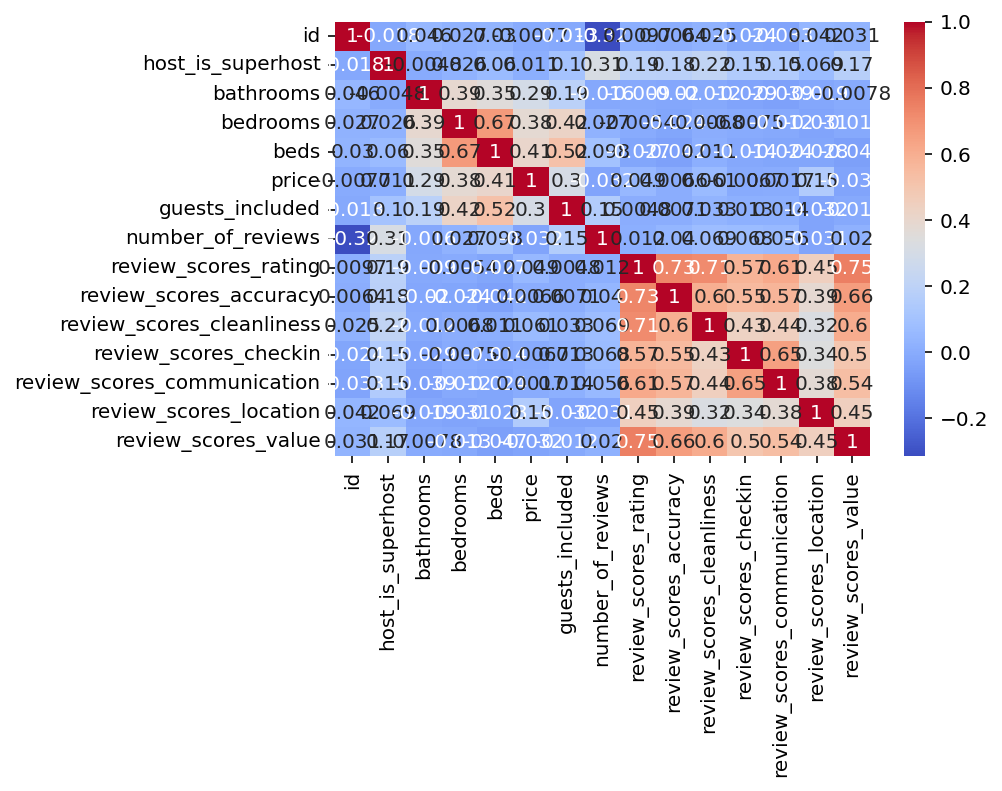

In [89]:
numeric_cols = df_clean.select_dtypes(include = ['float', 'int']).columns
corr_matrix = df_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

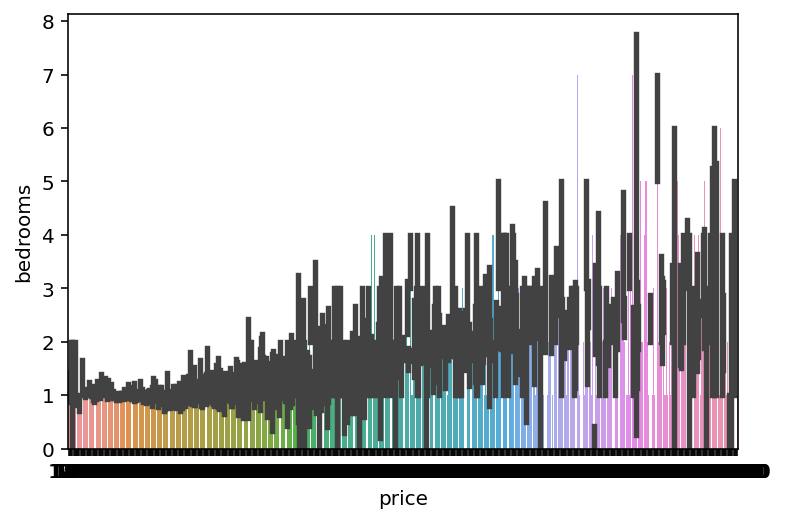

In [102]:
sns.barplot(data=df_clean, x = 'price', y = 'bedrooms')

## model

In [95]:
from sklearn.pipeline import Pipeline, make_union
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Define the column transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_value']), 
        ('cat', OneHotEncoder(), ['host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type']), 
        ('imputer', SimpleImputer(strategy='most_frequent')), 
        ])

# Define the pipeline including preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('regressor', LinearRegression())
    ])

In [96]:
from sklearn.model_selection import train_test_split
X = df_clean.drop('price', axis=1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
pipeline.fit(X_train, y_train)

ValueError: not enough values to unpack (expected 3, got 2)

### Testing for Overfitting

In [44]:
# testing train set
predict_train = pipeline.predict(train_X)
# rmse
def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred)**2))
# test set should have less root mean squared error
rmse(train_y, predict_train)


NameError: name 'pipeline' is not defined

## TEST

In [45]:
test_df = pd.read_csv('test.csv')

C:\Users\jyson\AppData\Local\Temp\ipykernel_29404\2996529429.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('test.csv')


In [46]:
test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)

# Test the pipeline on the test data
# test_y = pipeline.predict(test_X)

NameError: name 'pipeline' is not defined

In [ ]:
X_test, y_test = train_test_split(X, y, test_size=1.0)
predict_test = pipeline.predict(X_test)

In [53]:
# should be 17337
# print(len(test_y))
print(len(predict_test))

17337


In [27]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = predict_test #test_y
# output_df.to_csv('my_baseline.csv', index = False)